In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
import numpy as np
import pickle
import os
import gc

pd.options.display.float_format = '{:,.2f}'.format
plt.rcParams["figure.figsize"] = [15,10]

In [2]:
df = sns.load_dataset("diamonds")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.50,55.00,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.80,61.00,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.90,65.00,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.40,58.00,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.30,58.00,335,4.34,4.35,2.75


***

# Indexing

In [81]:
df = df.reset_index(drop = True) # Resting index s.t. it goes from 0 to N-1

### Single Columns

In [15]:
df["carat"].head() # Extract single column by name as pandas.core.series.Series

0    0.23
1    0.21
2    0.23
3    0.29
4    0.31
Name: carat, dtype: float64

In [22]:
df.carat.head() # Extract single column by name as pandas.core.series.Series

0    0.23
1    0.21
2    0.23
3    0.29
4    0.31
Name: carat, dtype: float64

In [24]:
df["carat"].to_numpy() # Extract single column by name as numpy array

array([0.23, 0.21, 0.23, ..., 0.7 , 0.86, 0.75])

In [39]:
df.carat.values # Extract single column by name as numpy array

array([0.23, 0.21, 0.23, ..., 0.7 , 0.86, 0.75])

In [43]:
df.iloc[:, 1].head() # Extract single column by index as pandas.core.series.Series

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: object

In [45]:
df.iloc[:, 1].values # Extract single column by index as numpy array

array(['Ideal', 'Premium', 'Good', ..., 'Very Good', 'Premium', 'Ideal'],
      dtype=object)

In [47]:
df.iloc[:, 1].to_numpy() # Extract single column by index as numpy array

array(['Ideal', 'Premium', 'Good', ..., 'Very Good', 'Premium', 'Ideal'],
      dtype=object)

### Multiple Columns

In [91]:
df[["carat", "color"]].head() # Extract multiple columns by name as pandas.core.frame.DataFrame

,carat,color
0,0.23,E
1,0.21,E
2,0.23,E
3,0.29,I
4,0.31,J


In [93]:
df.loc[:, ["carat", "color"]].head() # Extract multiple columns by name as pandas.core.frame.DataFrame

,carat,color
0,0.23,E
1,0.21,E
2,0.23,E
3,0.29,I
4,0.31,J


In [53]:
df.loc[:, "carat":"color"].head() # Extract multiple columns by name from name "a" to name "b" as pandas.core.frame.DataFrame

,carat,cut,color
0,0.23,Ideal,E
1,0.21,Premium,E
2,0.23,Good,E
3,0.29,Premium,I
4,0.31,Good,J


In [35]:
df.iloc[:, [2, 3]].head() # Extract multiple columns by index as pandas.core.frame.DataFrame

,color,clarity
0,E,SI2
1,E,SI1
2,E,VS1
3,I,VS2
4,J,SI2


In [54]:
df.iloc[:, range(0,3)].head() # Extract multiple columns by index from index a to index b as pandas.core.frame.DataFrame

,carat,cut,color
0,0.23,Ideal,E
1,0.21,Premium,E
2,0.23,Good,E
3,0.29,Premium,I
4,0.31,Good,J


### Rows

In [66]:
df.iloc[2, ] # extract single row by index as pandas.core.series.Series

carat      0.23
cut        Good
color         E
clarity     VS1
depth      56.9
table        65
price       327
x          4.05
y          4.07
z          2.31
Name: 2, dtype: object

In [69]:
df.iloc[2:5, ] # extract multiple rows from index a to index b as pandas.core.frame.DataFrame

,carat,cut,color,clarity,depth,table,price,x,y,z
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [75]:
df.sample(frac = 0.1).head() # randomly extract 10% of the rows as pandas.core.frame.DataFrame

,carat,cut,color,clarity,depth,table,price,x,y,z
18964,1.72,Ideal,E,I1,62.2,55.0,7802,7.70,7.67,4.78
28760,0.31,Ideal,E,VS2,60.9,57.0,680,4.34,4.36,2.65
46366,0.54,Very Good,E,VS2,63.1,58.0,1760,5.21,5.13,3.26
34852,0.30,Premium,G,VVS2,61.3,57.0,878,4.33,4.29,2.64
19217,2.01,Good,H,I1,61.7,63.0,7959,7.91,7.94,4.89


In [77]:
df.sample(n = 10).head() # randomly extract 10 rows as pandas.core.frame.DataFrame

,carat,cut,color,clarity,depth,table,price,x,y,z
20690,1.23,Ideal,G,VS1,61.4,56.0,8970,6.91,6.96,4.26
50278,0.70,Very Good,E,SI1,60.3,58.0,2239,5.73,5.85,3.49
994,0.76,Premium,E,SI1,61.1,58.0,2897,5.91,5.85,3.59
38987,0.36,Premium,G,VVS2,61.9,58.0,1053,4.60,4.54,2.83
22736,1.15,Ideal,F,VVS2,62.7,57.0,10757,6.69,6.65,4.18


In [80]:
df.drop_duplicates().head() # extract all rows with duplicates dropped as pandas.core.frame.DataFrame

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [83]:
df.nlargest(10, "price").head() # extract all 10 rows with largest values for price as pandas.core.frame.DataFrame

,carat,cut,color,clarity,depth,table,price,x,y,z
27749,2.29,Premium,I,VS2,60.8,60.0,18823,8.50,8.47,5.16
27748,2.00,Very Good,G,SI1,63.5,56.0,18818,7.90,7.97,5.04
27747,1.51,Ideal,G,IF,61.7,55.0,18806,7.37,7.41,4.56
27746,2.07,Ideal,G,SI2,62.5,55.0,18804,8.20,8.13,5.11
27745,2.00,Very Good,H,SI1,62.8,57.0,18803,7.95,8.00,5.01


In [86]:
df.nsmallest(10, "price").head() # extract all 10 rows with smallest values for price as pandas.core.frame.DataFrame

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Rows and Columns

In [99]:
df.loc[0:10, ["carat", "price"]].head() # extract rows by index and columns by name

,carat,price
0,0.23,326
1,0.21,326
2,0.23,327
3,0.29,334
4,0.31,335


In [98]:
df.iloc[0:10, 0:3].head() # extract rows by index and columns by index

,carat,cut,color
0,0.23,Ideal,E
1,0.21,Premium,E
2,0.23,Good,E
3,0.29,Premium,I
4,0.31,Good,J


***

# Filtering

In [109]:
df[df.color == "E"].head() # filter rows based on 1 condition

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
14,0.20,Premium,E,SI2,60.2,62.0,345,3.79,3.75,2.27


In [110]:
df[df["color"] == "E"].head() # filter rows based on 1 condition

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
14,0.20,Premium,E,SI2,60.2,62.0,345,3.79,3.75,2.27


In [111]:
df[(df.color == "E") & (df.cut == "Ideal")].head() # filter rows based on >1 condition

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
82,0.26,Ideal,E,VVS2,62.9,58.0,554,4.02,4.06,2.54
90,0.70,Ideal,E,SI1,62.5,57.0,2757,5.70,5.72,3.57
109,0.59,Ideal,E,VVS2,62.0,55.0,2761,5.38,5.43,3.35
111,0.74,Ideal,E,SI2,62.2,56.0,2761,5.80,5.84,3.62


In [112]:
df[(df["color"] == "E") & (df["cut"] == "Ideal")].head() # filter rows based on >1 condition

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
82,0.26,Ideal,E,VVS2,62.9,58.0,554,4.02,4.06,2.54
90,0.70,Ideal,E,SI1,62.5,57.0,2757,5.70,5.72,3.57
109,0.59,Ideal,E,VVS2,62.0,55.0,2761,5.38,5.43,3.35
111,0.74,Ideal,E,SI2,62.2,56.0,2761,5.80,5.84,3.62


In [123]:
df.loc[(df["color"] == "E") & (df["cut"] == "Ideal"), ["color", "cut"]].head() # filter rows based on >1 condition and subset columns based on name

,color,cut
0,E,Ideal
82,E,Ideal
90,E,Ideal
109,E,Ideal
111,E,Ideal


***

# Regex

In [78]:
df_sub = df[df['cut'].str.contains("Ideal|Premium")] # Filter to rows that have Ideal or Premium cut
df_sub.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
11,0.23,Ideal,J,VS1,62.8,56.0,340,3.93,3.90,2.46
12,0.22,Premium,F,SI1,60.4,61.0,342,3.88,3.84,2.33


***

# Sorting

In [131]:
df.sort_values('price', ascending = False).head() # Sort rows by a certain column

,carat,cut,color,clarity,depth,table,price,x,y,z
27749,2.29,Premium,I,VS2,60.8,60.0,18823,8.50,8.47,5.16
27748,2.00,Very Good,G,SI1,63.5,56.0,18818,7.90,7.97,5.04
27747,1.51,Ideal,G,IF,61.7,55.0,18806,7.37,7.41,4.56
27746,2.07,Ideal,G,SI2,62.5,55.0,18804,8.20,8.13,5.11
27745,2.00,Very Good,H,SI1,62.8,57.0,18803,7.95,8.00,5.01


In [135]:
df.sort_index(ascending = False).head() # Sort rows by index

,carat,cut,color,clarity,depth,table,price,x,y,z
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50


In [141]:
df.sort_index(axis = 1, ascending = False).head() # Sort columns by name

,z,y,x,table,price,depth,cut,color,clarity,carat
0,2.43,3.98,3.95,55.0,326,61.5,Ideal,E,SI2,0.23
1,2.31,3.84,3.89,61.0,326,59.8,Premium,E,SI1,0.21
2,2.31,4.07,4.05,65.0,327,56.9,Good,E,VS1,0.23
3,2.63,4.23,4.20,58.0,334,62.4,Premium,I,VS2,0.29
4,2.75,4.35,4.34,58.0,335,63.3,Good,J,SI2,0.31


In [20]:
# Sorting list X based on list Y

X = ["a", "b", "c", "d", "e", "f", "g", "h", "i"]
Y = [ 0,   1,   1,    0,   1,   2,   2,   0,   1]

X = [x for _,x in sorted(zip(Y, X))]
Y.sort() # Important to sort Y after X if both are to be sorted
print(X)
print(Y)

['a', 'd', 'h', 'b', 'c', 'e', 'i', 'f', 'g']
[0, 0, 0, 1, 1, 1, 1, 2, 2]


***

# Removing data frames from memory

In [15]:
# Remove 1 data frame (or any other object) from memory
df1 = sns.load_dataset("diamonds")

del df1 
gc.collect();


In [21]:
# Remove >1 data frame (or any other objects) from memory
df1 = sns.load_dataset("diamonds")
df2 = sns.load_dataset("mpg")
df3 = sns.load_dataset("iris")

del [df1, df2, df3]
gc.collect();


***

# Removing Rows/Columns

In [26]:
df.shape # shape before removal

(53940, 10)

In [353]:
df = df.drop(columns=['carat', 'z']) # Drop columns by name
df.shape

(53940, 8)

In [27]:
df = df.loc[:,~df.columns.str.contains('table', case=False)] # Drop columns with names that contain a string
df.shape

(53940, 9)

In [29]:
df = df.loc[:,~df.columns.str.startswith('cut')] # Drop columns with names that start with a string
df.shape

(53940, 8)

In [354]:
df = df.drop(range(0, 10)) # Drop rows by index
df.shape

(53930, 8)

In [355]:
df = df.drop(df[df.price > 15000].index, axis=0) # Drop rows by condition
df.shape

(52275, 8)

***

# Adding Rows/Columns

In [359]:
df["price_in_k"] = df["price"]/1000 # add a new column computed based on 1 column
df.head()

,cut,color,clarity,depth,table,price,x,y,price_in_k
10,Good,J,SI1,64.0,55.0,339,4.25,4.28,0.339
11,Ideal,J,VS1,62.8,56.0,340,3.93,3.90,0.340
12,Premium,F,SI1,60.4,61.0,342,3.88,3.84,0.342
13,Ideal,J,SI2,62.2,54.0,344,4.35,4.37,0.344
14,Premium,E,SI2,60.2,62.0,345,3.79,3.75,0.345


In [360]:
df["price_depth_ratio"] = df["price"]/df["depth"] # add a new column computed based on >1 columns
df.head()

,cut,color,clarity,depth,table,price,x,y,price_in_k,price_depth_ratio
10,Good,J,SI1,64.0,55.0,339,4.25,4.28,0.339,5.296875
11,Ideal,J,VS1,62.8,56.0,340,3.93,3.90,0.340,5.414013
12,Premium,F,SI1,60.4,61.0,342,3.88,3.84,0.342,5.662252
13,Ideal,J,SI2,62.2,54.0,344,4.35,4.37,0.344,5.530547
14,Premium,E,SI2,60.2,62.0,345,3.79,3.75,0.345,5.730897


In [370]:
df_test = df.append(df.iloc[0,]) # append 1 observation (or more) to a data frame
print(df_test.head(3))
print(df_test.tail(3))

        cut color clarity  depth  table  price     x     y  price_in_k  \
10     Good     J     SI1   64.0   55.0    339  4.25  4.28       0.339   
11    Ideal     J     VS1   62.8   56.0    340  3.93  3.90       0.340   
12  Premium     F     SI1   60.4   61.0    342  3.88  3.84       0.342   

    price_depth_ratio  
10           5.296875  
11           5.414013  
12           5.662252  
           cut color clarity  depth  table  price     x     y  price_in_k  \
53938  Premium     H     SI2   61.0   58.0   2757  6.15  6.12       2.757   
53939    Ideal     D     SI2   62.2   55.0   2757  5.83  5.87       2.757   
10        Good     J     SI1   64.0   55.0    339  4.25  4.28       0.339   

       price_depth_ratio  
53938          45.196721  
53939          44.324759  
10              5.296875  


In [11]:
# Concatenate multiple data frames (vertically)
df1 = df.iloc[0:3, :]
df2 = df.iloc[3:6, :]
df3 = df.iloc[6:9, :]

frames = [df1, df2, df3]
df_test = pd.concat(frames, axis = 0)
df_test

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49


In [74]:
# Concatenate multiple data frames (horizontally)
df1 = df.iloc[0:3, :].reset_index(drop = True) # Resetting row index is required!
df2 = df.iloc[3:6, :].reset_index(drop = True) # Resetting row index is required!
df3 = df.iloc[6:9, :].reset_index(drop = True) # Resetting row index is required!

frames = [df1, df2, df3]
df_test = pd.concat(frames, axis = 1, join = "inner")
df_test

,carat,cut,color,clarity,depth,table,price,x,y,z,...,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,...,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,...,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,...,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49


***

# Advanced df operations

In [94]:
# Gettign a data frame with all possible combinations of rows of 2 data frames
# https://stackoverflow.com/questions/53699012/performant-cartesian-product-cross-join-with-pandas
def cartesian_product_basic(df_left, df_right):
    return(df_left.assign(key=1).merge(df_right.assign(key=1), on='key').drop('key', 1))

df1 = df.iloc[0:3, :] # 3 rows
df2 = df.iloc[3:6, :] # 3 rows

cartesian_product_basic(df1, df2) # 3x3 = 9 rows

,carat_x,cut_x,color_x,clarity_x,depth_x,table_x,price_x,x_x,y_x,z_x,carat_y,cut_y,color_y,clarity_y,depth_y,table_y,price_y,x_y,y_y,z_y
0,0.23,Ideal,E,SI2,61.50,55.00,326,3.95,3.98,2.43,0.29,Premium,I,VS2,62.40,58.00,334,4.20,4.23,2.63
1,0.23,Ideal,E,SI2,61.50,55.00,326,3.95,3.98,2.43,0.31,Good,J,SI2,63.30,58.00,335,4.34,4.35,2.75
2,0.23,Ideal,E,SI2,61.50,55.00,326,3.95,3.98,2.43,0.24,Very Good,J,VVS2,62.80,57.00,336,3.94,3.96,2.48
3,0.21,Premium,E,SI1,59.80,61.00,326,3.89,3.84,2.31,0.29,Premium,I,VS2,62.40,58.00,334,4.20,4.23,2.63
4,0.21,Premium,E,SI1,59.80,61.00,326,3.89,3.84,2.31,0.31,Good,J,SI2,63.30,58.00,335,4.34,4.35,2.75
5,0.21,Premium,E,SI1,59.80,61.00,326,3.89,3.84,2.31,0.24,Very Good,J,VVS2,62.80,57.00,336,3.94,3.96,2.48
6,0.23,Good,E,VS1,56.90,65.00,327,4.05,4.07,2.31,0.29,Premium,I,VS2,62.40,58.00,334,4.20,4.23,2.63
7,0.23,Good,E,VS1,56.90,65.00,327,4.05,4.07,2.31,0.31,Good,J,SI2,63.30,58.00,335,4.34,4.35,2.75
8,0.23,Good,E,VS1,56.90,65.00,327,4.05,4.07,2.31,0.24,Very Good,J,VVS2,62.80,57.00,336,3.94,3.96,2.48


***

# Summarizing

In [37]:
df.groupby("cut").size() # get counts by group

cut
Fair          1610
Good          4906
Ideal        21551
Premium      13791
Very Good    12082
dtype: int64

In [56]:
df.groupby("cut").min().select_dtypes(include=['int', "float"]) # get min/max/mean/median/var/std of numeric variables by group

,carat,depth,table,price,x,y,z
cut,,,,,,,
Fair,0.22,43.0,49.0,337,0.0,0.0,0.0
Good,0.23,54.3,51.0,327,0.0,0.0,0.0
Ideal,0.20,43.0,43.0,326,0.0,0.0,0.0
Premium,0.20,58.0,51.0,326,0.0,0.0,0.0
Very Good,0.20,56.8,44.0,336,0.0,0.0,0.0


In [51]:
df.select_dtypes(include=['int', 'float']).aggregate(['sum', 'min'])

,carat,depth,table,price,x,y,z
sum,43040.87,3330762.9,3099240.5,212135217,309138.62,309320.33,190879.3
min,0.20,43.0,43.0,326,0.00,0.00,0.0


In [90]:
df.describe()

,carat,depth,table,price,x,y,z
count,"53,940.00","53,940.00","53,940.00","53,940.00","53,940.00","53,940.00","53,940.00"
mean,0.80,61.75,57.46,"3,932.80",5.73,5.73,3.54
std,0.47,1.43,2.23,"3,989.44",1.12,1.14,0.71
min,0.20,43.00,43.00,326.00,0.00,0.00,0.00
25%,0.40,61.00,56.00,950.00,4.71,4.72,2.91
50%,0.70,61.80,57.00,"2,401.00",5.70,5.71,3.53
75%,1.04,62.50,59.00,"5,324.25",6.54,6.54,4.04
max,5.01,79.00,95.00,"18,823.00",10.74,58.90,31.80


In [5]:
df = sns.load_dataset("mpg")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.00,8,307.00,130.00,3504,12.00,70,usa,chevrolet chevelle malibu
1,15.00,8,350.00,165.00,3693,11.50,70,usa,buick skylark 320
2,18.00,8,318.00,150.00,3436,11.00,70,usa,plymouth satellite
3,16.00,8,304.00,150.00,3433,12.00,70,usa,amc rebel sst
4,17.00,8,302.00,140.00,3449,10.50,70,usa,ford torino


In [8]:
# Equivalent to table() from R

df = sns.load_dataset("mpg")

tab = pd.crosstab(index = df["cylinders"].astype(str), columns="count")
print(tab)

tab = pd.crosstab(index = df["cylinders"].astype(str), columns="perc")
print(tab/tab.sum())

col_0      count
cylinders       
3              4
4            204
5              3
6             84
8            103
col_0      perc
cylinders      
3          0.01
4          0.51
5          0.01
6          0.21
8          0.26


In [4]:
# Show all rows and columns in jupyter notebook (even if there are hundreds)

from IPython.core.display import HTML
display(HTML(df.to_html()))

***

# Reshaping

Note that for reshaping with `pivot`, there need to be 2 non-numerical columns (for `index` and `column`). E.g. one column with a date and another with a category. Importantly, every combination of the values of these 2 columns can only occur 1x. This is why e.g. `pivot` is often used for date/time related issues.

In [26]:
df_raw = sns.load_dataset("flights")
df_raw.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [27]:
df_piv = df.pivot(index="year", columns="month", values="passengers")
df_piv.head()

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


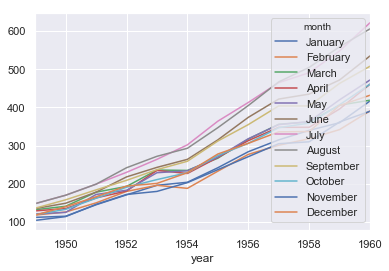

In [33]:
df_piv.plot();

***

# Variable Types

### Descriptives

In [290]:
df.dtypes # see all variable types

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [291]:
df.info() # see all variable types and additional info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


### Conversion

Converting columns to different data types can be super useful for big data sets. Consider converting from 'float64' to a smaller float e.g. 'float32' or 'float16' and conider converting from any float to 'int' if decimals are not very relevant.

In [303]:
# Convert single column

df["table"] = df["table"].astype('int') 

In [ ]:
# Converting several columns (for different data frame than shown here)

df.loc[:,df.columns.str.contains('volume', case=False)] = df.loc[:,df.columns.str.contains('volume', case=False)].astype('int', copy=False)
df.loc[:,~df.columns.str.contains('volume', case=False)] = df.loc[:,~df.columns.str.contains('volume', case=False)].astype('float16', copy=False)

***

# Datetime

In [18]:
import pandas as pd

# This might be a time stamp based on text
date_rng = pd.date_range(start='1/1/2018', end='1/08/2018', freq='H')
df = pd.DataFrame({"timestamp": date_rng})

# This ensures correct timestamp format
df['timestamp'] = pd.to_datetime(df['timestamp'])


In [22]:
# Extract useful time information
df['month'] = df.timestamp.apply(lambda x: x.month)
df['week'] = df.timestamp.apply(lambda x: x.isocalendar()[1])
df['day'] = df.timestamp.apply(lambda x: x.isoweekday())
df['hour'] = df.timestamp.apply(lambda x: x.hour)
df

,timestamp,month,week,day,hour
0,2018-01-01 00:00:00,1,1,1,0
1,2018-01-01 01:00:00,1,1,1,1
2,2018-01-01 02:00:00,1,1,1,2
3,2018-01-01 03:00:00,1,1,1,3
4,2018-01-01 04:00:00,1,1,1,4
...,...,...,...,...,...
164,2018-01-07 20:00:00,1,1,7,20
165,2018-01-07 21:00:00,1,1,7,21
166,2018-01-07 22:00:00,1,1,7,22
167,2018-01-07 23:00:00,1,1,7,23


***
# NAs

### Descriptives

In [239]:
df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv", header = None)
df.iloc[:, 1:6] = df.iloc[:, 1:6].replace(0, np.nan) # replace 0s with NaN in all rows from column 1 to 5
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [252]:
df.isna().sum().sum() # get total number of NA

652

In [253]:
df.isna().any(axis = 0).sum() # number of columns with NA

5

In [250]:
df.isna().any(axis = 1).sum() # number of rows with NA

376

In [220]:
df.isna().sum() # get number of NA by column

0      0
1      5
2     35
3    227
4    374
5     11
6      0
7      0
8      0
dtype: int64

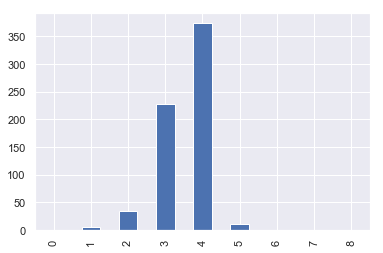

In [227]:
df.isnull().sum(axis=0).plot.bar(); # plot number of NA by column

In [232]:
df.isna().sum(axis=1).head() # get number of NA by row

0    1
1    1
2    2
3    0
4    0
dtype: int64

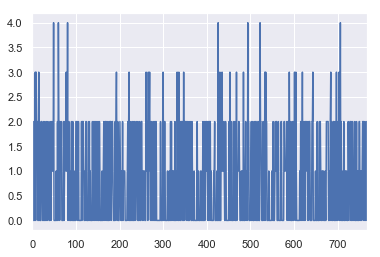

In [233]:
df.isna().sum(axis=1).plot(); # plot number of NA by row

### Removal

In [262]:
df_rowsRemoved = df.dropna(axis = 0)

In [263]:
df_rowsRemoved.isna().any(axis = 1).sum() # number of rows with NA

0

In [264]:
df_colsRemoved = df.dropna(axis = 1)

In [266]:
df_rowsRemoved.isna().any(axis = 1).sum() # number of rows with NA

0

### Replacement

In [274]:
df_MeanReplaced = df.fillna(df.mean()) # replace NA with column mean 
df_MeanReplaced.head()

,0,1,2,3,4,5,6,7,8
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [276]:
df_MedianReplaced = df.fillna(df.median()) # replace NA with column median 
df_MedianReplaced.head()

,0,1,2,3,4,5,6,7,8
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [278]:
df_0Replaced = df.fillna(-999) # replace NA with constant
df_0Replaced.head()

,0,1,2,3,4,5,6,7,8
0,6,148.0,72.0,35.0,-999.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,-999.0,26.6,0.351,31,0
2,8,183.0,64.0,-999.0,-999.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


***

# Fast Plots

### Scatterplot

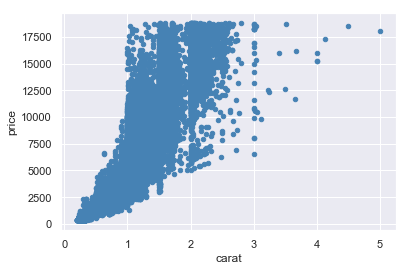

In [189]:
df.plot.scatter(x = "carat", y = "price", c = "steelblue");

### Histogram

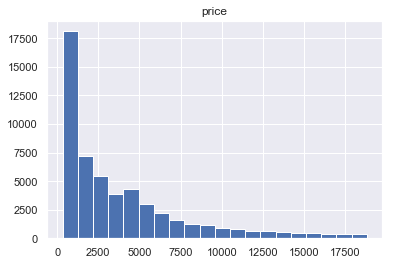

In [180]:
df.hist("price", bins = 20); 

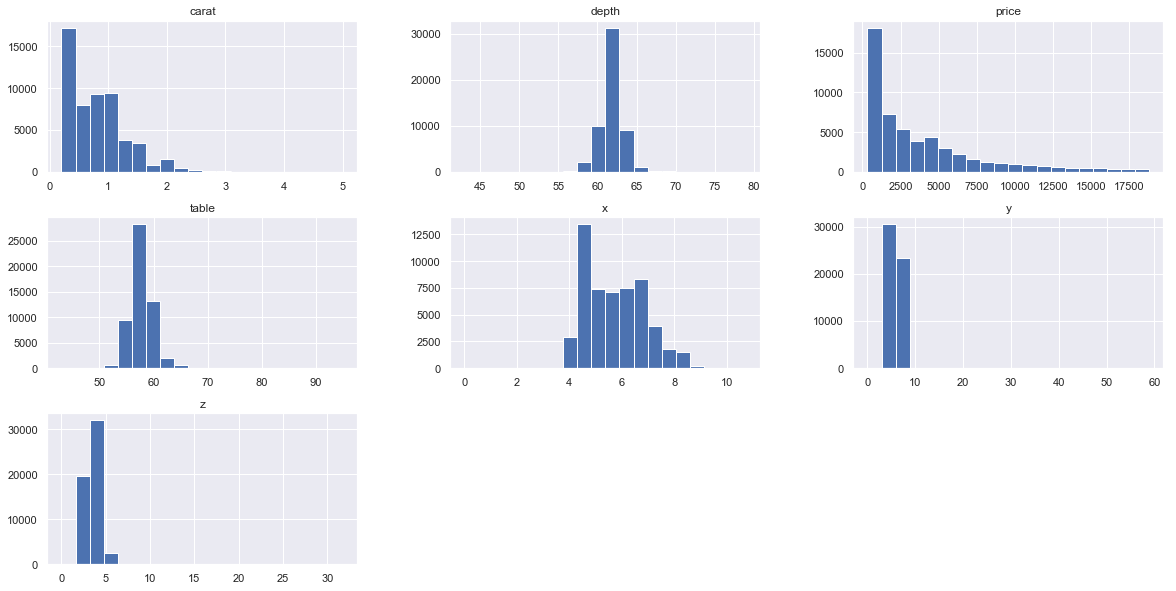

In [163]:
df.hist(bins = 20, figsize = (20,10)); 

***